# Problem Set 5
## Juan Roa A15541981

### 1st block (Imports)

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2nd block (Loading Data)

In [106]:
data = pd.read_excel('messed_up_iris.xlsx')
data = data.drop(['Unnamed: 0'], axis=1)
print(data.shape)
data.head()

(150, 7)


,sepal_length,sepal_width,petal_length,petal_width,species,color,origin
0,5.1,3.5,1.4,0.2,setosa,green,usa
1,4.9,3.0,1.4,0.2,setosa,yellow,usa
2,4.7,3.2,1.3,0.2,setosa,green,usa
3,4.6,3.1,1.5,0.2,setosa,orange,japan
4,5.0,3.6,1.4,0.2,setosa,blue,europe


### 3rd block (Remove Missing Data)

sepal_length     True
sepal_width      True
petal_length     True
petal_width      True
species         False
color            True
origin          False
dtype: bool
(145, 7)
AxesSubplot(0.125,0.125;0.62x0.755)


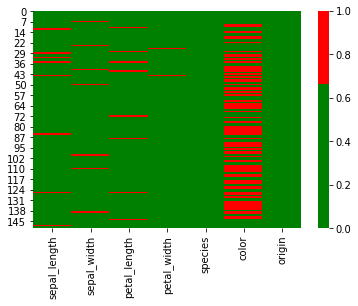

In [107]:
# drops missing values
data = data.dropna(thresh=3)
print(data.isna().any())
print(data.shape)
print(sns.heatmap(data.isnull(), cmap=['Green', 'Green', 'Red']))

### 4th block (Remove Duplicates)

In [108]:
# shows the rows that are duplicates
print(data[data.duplicated()])

# gets rid of duplicates
data = data.drop_duplicates(ignore_index=True)

# shows any duplicates remaining
print(data[data.duplicated()])

print(data.shape)

    sepal_length  sepal_width  petal_length  ...  species   color  origin
34           5.1          3.7           1.5  ...   setosa  orange  europe
42           5.1          3.7           1.5  ...   setosa  orange  europe
59           4.9          3.6           1.4  ...   setosa  yellow   japan
87           4.9          3.6           1.4  ...   setosa  yellow   japan

[4 rows x 7 columns]
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species, color, origin]
Index: []
(141, 7)


### 5th block (Dummy Code Categorical Data)

In [109]:
# replaces all misspellings
data['species'] = np.where(data['species'] == 'seotsa', 'setosa', data['species'])
data['species'] = np.where(data['species'] == 'west virginia', 'virginica', data['species'])
data['species'] = np.where(data['species'] == 'versicolr', 'versicolor', data['species'])
data['species'] = np.where(data['species'] == 'virginia', 'virginica', data['species'])
data['origin'] = np.where(data['origin'] == 'uas', 'usa', data['origin'])
data['origin'] = np.where(data['origin'] == 'euarope', 'europe', data['origin'])

In [110]:
# creates categorical dataframes
species_df = pd.get_dummies(data['species'], drop_first=True)
color_df = pd.get_dummies(data['color'], drop_first=True)
origin_df = pd.get_dummies(data['origin'], drop_first=True)

print('species: \n', species_df.head())
print('color: \n', color_df.head())
print('origin: \n', origin_df.head())

species: 
    versicolor  virginica
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
color: 
    blue  green  orange  purple  red  yellow
0     0      1       0       0    0       0
1     0      0       0       0    0       1
2     0      1       0       0    0       0
3     0      0       1       0    0       0
4     1      0       0       0    0       0
origin: 
    japan  usa
0      0    1
1      0    1
2      0    1
3      1    0
4      0    0


In [111]:
# concatenates original data with dummy code
new_data = pd.concat([data, species_df, color_df, origin_df], axis=1)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,color,origin,versicolor,virginica,blue,green,orange,purple,red,yellow,japan,usa
0,5.1,3.5,1.4,0.2,setosa,green,usa,0,0,0,1,0,0,0,0,0,1
1,4.9,3.0,1.4,0.2,setosa,yellow,usa,0,0,0,0,0,0,0,1,0,1
2,4.7,3.2,1.3,0.2,setosa,green,usa,0,0,0,1,0,0,0,0,0,1
3,4.6,3.1,1.5,0.2,setosa,orange,japan,0,0,0,0,1,0,0,0,1,0
4,5.0,3.6,1.4,0.2,setosa,blue,europe,0,0,1,0,0,0,0,0,0,0


### 6th block (Drop Redundant Columns)

In [112]:
# drops redundant columns
new_data = new_data.drop(['species', 'color', 'origin'], axis=1)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,blue,green,orange,purple,red,yellow,japan,usa
0,5.1,3.5,1.4,0.2,0,0,0,1,0,0,0,0,0,1
1,4.9,3.0,1.4,0.2,0,0,0,0,0,0,0,1,0,1
2,4.7,3.2,1.3,0.2,0,0,0,1,0,0,0,0,0,1
3,4.6,3.1,1.5,0.2,0,0,0,0,1,0,0,0,1,0
4,5.0,3.6,1.4,0.2,0,0,1,0,0,0,0,0,0,0


### 7th block (Remove Outliers > 2 Stds)

In [113]:
def remove_outliers(ser):

  '''
  Removes outliers from a series using the IQR method
  '''

  Q1 = ser.quantile(.25)
  Q3 = ser.quantile(.75)

  IQR = Q3 - Q1

                  # lower bound                # upper bound
  return np.where((ser < (Q1 - IQR * 1.5)) | (ser > (Q3 + IQR * 1.5)), np.nan, ser)

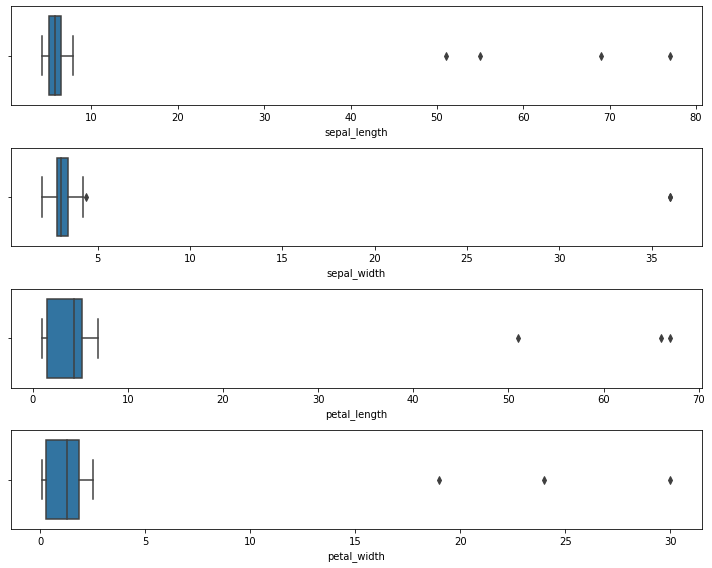

In [114]:
# creates boxplots with data for comparison (before removing outliers)
fig,axes = plt.subplots(4,1,figsize=[10,8])

count = 0
for column in new_data.columns:
  if isinstance(new_data[column][0],float) ==1:
    sns.boxplot(x = new_data[column], ax = axes[count])
    count += 1

plt.tight_layout()

In [115]:
# removes outliers
for column in new_data.columns:
  if isinstance(new_data[column][0],float)==1:
    new_data[column] = remove_outliers(new_data[column])

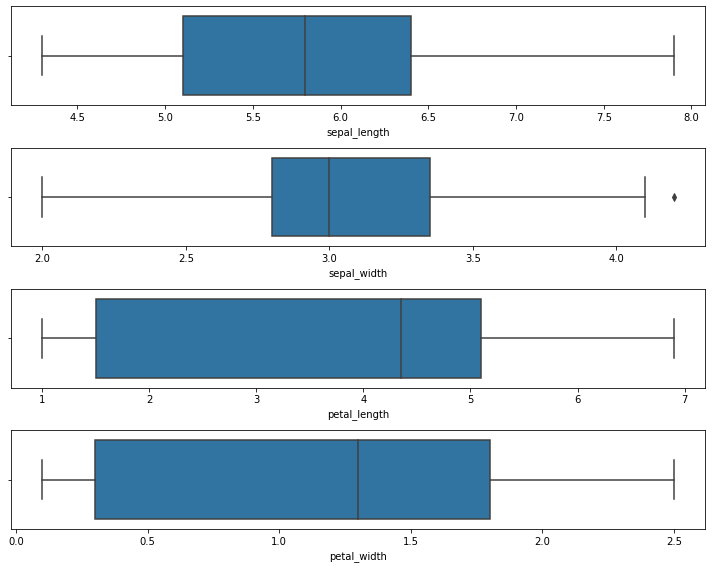

In [116]:
# creates new boxplots with data for comparison (after removing outliers)
fig,axes = plt.subplots(4,1,figsize=[10,8])

count = 0
for column in new_data.columns:
  if isinstance(new_data[column][0],float) ==1:
    sns.boxplot(x = new_data[column], ax = axes[count])
    count += 1

plt.tight_layout()

### 8th block (Remove/Change Missing Data)

In [117]:
# fills in missing values with median value of the dataframe
new_data.fillna(new_data.median(), inplace=True)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,blue,green,orange,purple,red,yellow,japan,usa
0,5.1,3.5,1.4,0.2,0,0,0,1,0,0,0,0,0,1
1,4.9,3.0,1.4,0.2,0,0,0,0,0,0,0,1,0,1
2,4.7,3.2,1.3,0.2,0,0,0,1,0,0,0,0,0,1
3,4.6,3.1,1.5,0.2,0,0,0,0,1,0,0,0,1,0
4,5.0,3.6,1.4,0.2,0,0,1,0,0,0,0,0,0,0


### 9th block (Bonus bins)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


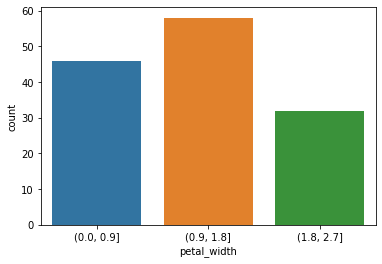

In [118]:
# creates 3 bins for petal_width
bins = pd.cut(data['petal_width'], bins=[0, 0.9, 1.8, 2.7], )
sns.countplot(bins)

### 10th block (Show Final Dataset)

AxesSubplot(0.125,0.125;0.62x0.755)


,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,blue,green,orange,purple,red,yellow,japan,usa
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000
mean,5.865248,3.047518,3.769149,1.201418,0.304965,0.347518,0.092199,0.042553,0.113475,0.028369,0.078014,0.12766,0.304965,0.361702
std,0.792914,0.414657,1.722401,0.760637,0.462034,0.477879,0.290337,0.202567,0.318304,0.166616,0.269150,0.33490,0.462034,0.482206
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.200000,2.800000,1.500000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,7.900000,4.200000,6.900000,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


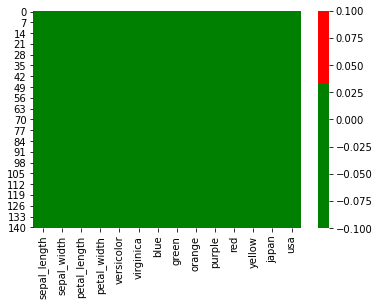

In [119]:
# shows no missing values
print(sns.heatmap(new_data.isnull(), cmap=['Green', 'Green', 'Red']))

# describes the cleaned data
new_data.describe()